<h1 style="text-align:center;color:Green">Regresion Lineal</h1>

<h3 style="color:blue">1. Modelo con datos simulados</h3>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* y = a + b*x
* x: 200 valores N(1.5,2.5)
* Ye = 5 + 1.9*x + e
* e distribuida según N(o,0.8)

In [89]:
#N(1.5, 2.5)
x = 1.5 + 2.5 * np.random.randn(200)

In [90]:
#errores media 0 y desviacion tipica 0.8
res = 0 + 0.8 * np.random.randn(200)

In [91]:
# prediccion (modelo lineal)
y_pred = 5 + 1.9 * x

In [92]:
# actual (observacion real)
y_act = 5 + 1.9 * x + res

In [93]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [94]:
df = pd.DataFrame(
      {
          'x' : x_list,
          'y_actual' : y_act_list, 
          'y_prediccion' : y_pred_list
      }
)

In [95]:
df.head()

x   y_actual  y_prediccion
0  0.722234   7.798843      6.372245
1  2.063440   8.906743      8.920535
2  0.361228   4.446699      5.686333
3  7.124001  19.126873     18.535602
4 -4.228441  -1.484994     -3.034039

In [96]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor Real vs Prediccion')

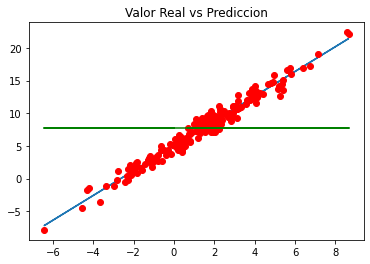

In [97]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, 'ro') #grafica de puntos
plt.plot(x, y_mean, 'g')
plt.title('Valor Real vs Prediccion')

**Uno de los indicadores que nos permite saber la efectividad del modelo es R2 para poder obtenerlo incorporaremos al df:**

   * Suma de los cuadrados de la regresion
   * Suma de los cuadrados de la diferencia
   * Suma de los cuadrados totales

In [98]:
df['SSR'] = (df['y_prediccion']-np.mean(y_act))**2
df['SSD'] = (df['y_prediccion']-df['y_actual'])**2
df['SST'] = (df['y_actual']-np.mean(y_act))**2

In [99]:
df.head()

x   y_actual  y_prediccion         SSR       SSD         SST
0  0.722234   7.798843      6.372245    1.857036  2.035184    0.004079
1  2.063440   8.906743      8.920535    1.405552  0.000190    1.373038
2  0.361228   4.446699      5.686333    4.196938  1.536691   10.812762
3  7.124001  19.126873     18.535602  116.653533  0.349602  129.775334
4 -4.228441  -1.484994     -3.034039  115.971666  2.399538   85.007847

In [100]:
SSR = sum(df['SSR'])
SSD = sum(df['SSD'])
SST = sum(df['SST'])

In [101]:
SSR, SSD, SST

(4194.577738496107, 138.9265899409172, 4346.665895901031)

In [105]:
SSR+SSD
#esta suma deberia ser igual a SST, lo mas seguro es que la diferencia
#sea por redondeo

4333.504328437024

In [103]:
R2 = SSR/SST
R2

0.9650103870305868

(array([ 6., 17., 16., 41., 39., 40., 21., 11.,  8.,  1.]),
 array([-1.97171493, -1.53525176, -1.09878859, -0.66232542, -0.22586226,
         0.21060091,  0.64706408,  1.08352725,  1.51999041,  1.95645358,
         2.39291675]),
 <BarContainer object of 10 artists>)

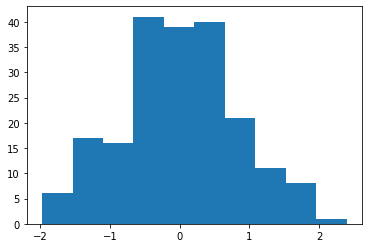

In [104]:
plt.hist(df['y_prediccion']-df['y_actual'])